### IMPORT PACKAGES ###

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()
from matplotlib.pyplot import style ; style.use('ggplot')

### TRAVERSING DATASET ###

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
age         1025 non-null int64
sex         1025 non-null int64
cp          1025 non-null int64
trestbps    1025 non-null int64
chol        1025 non-null int64
fbs         1025 non-null int64
restecg     1025 non-null int64
thalach     1025 non-null int64
exang       1025 non-null int64
oldpeak     1025 non-null float64
slope       1025 non-null int64
ca          1025 non-null int64
thal        1025 non-null int64
target      1025 non-null int64
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
df=df.astype('int16')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
age         1025 non-null int16
sex         1025 non-null int16
cp          1025 non-null int16
trestbps    1025 non-null int16
chol        1025 non-null int16
fbs         1025 non-null int16
restecg     1025 non-null int16
thalach     1025 non-null int16
exang       1025 non-null int16
oldpeak     1025 non-null int16
slope       1025 non-null int16
ca          1025 non-null int16
thal        1025 non-null int16
target      1025 non-null int16
dtypes: int16(14)
memory usage: 28.1 KB


In [9]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1,1,1,3,0


### COUNT PLOT FOR CHECKING FOR IM_BALANCED DATASET ##

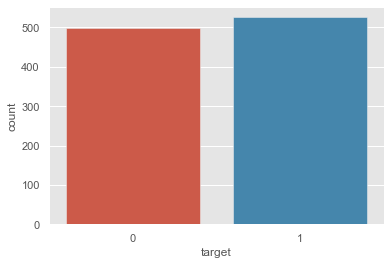

In [10]:
sns.countplot(x=df.target)

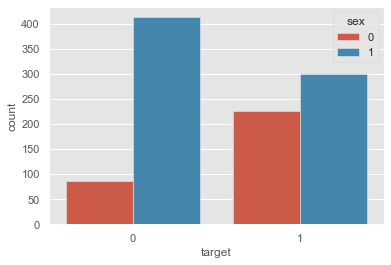

In [11]:
sns.countplot(x=df.target,hue=df.sex)

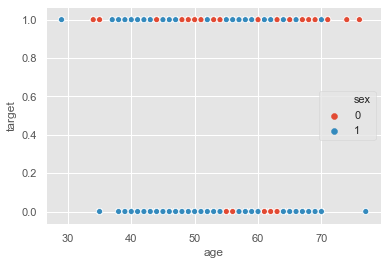

In [18]:
sns.scatterplot(df.age,df.target,hue=df.sex)

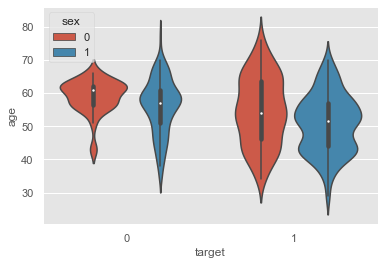

In [19]:
sns.violinplot(x=df.target,y=df.age,hue=df.sex)

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1,1,3,2,0


### DATA REDUCTION ###

In [21]:
from sklearn.decomposition import PCA
pca = PCA(2)
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x,y)


In [22]:
pca.fit(x,y)
x_pca = pca.transform(x)

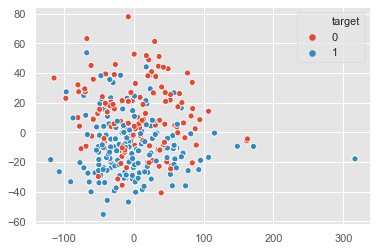

In [24]:
sns.scatterplot(x_pca[:,0],x_pca[:,1],hue=df.target)

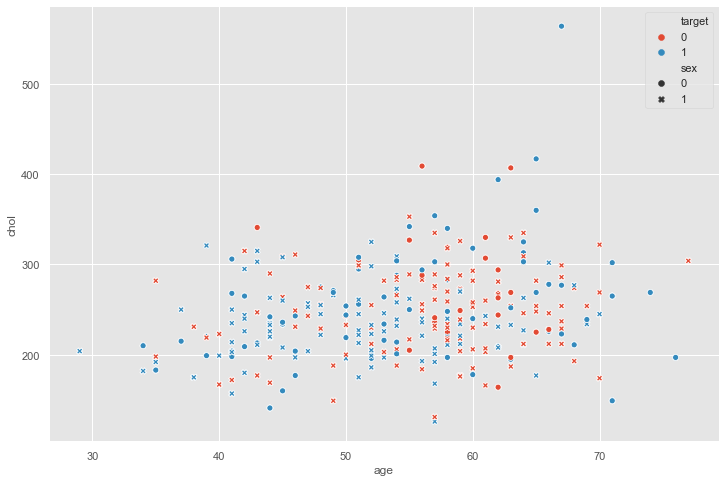

In [28]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df.age,y=df.chol,hue=df.target,style=df.sex)
plt.show()

### CORRELATION BETWEEN ATTRIBUTES ###/

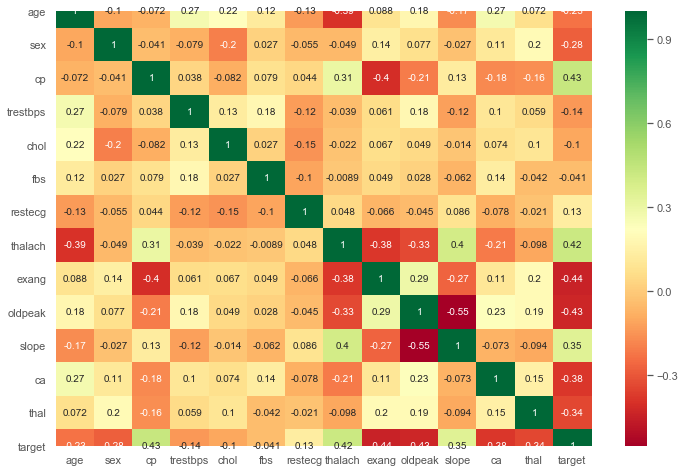

In [31]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
plt.show()

### CLASSIFICATION ALGORITHMs ###

In [32]:
from sklearn.svm import SVC
svm = SVC(gamma=0.1,kernel='rbf')
svm.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [33]:
svm.score(x_test,y_test)

1.0

In [34]:
from sklearn.ensemble import GradientBoostingClassifier as GBC
gb = GBC()
gb.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [35]:
gb.score(x_test,y_test)

0.9844357976653697

In [37]:
from sklearn.ensemble import RandomForestClassifier as RFC
rf = RFC()
rf.fit(x_train,y_train)

A:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
rf.score(x_test,y_test)

0.9883268482490273

In [39]:
pd.to_pickle(svm,'svm_heart_1.pickle')

In [40]:
y_pred=svm.predict(x_test)

### DISPLAYING RESULTS ###

In [41]:
from sklearn.metrics import confusion_matrix as cm
cm(y_test,y_pred)

array([[119,   0],
       [  0, 138]], dtype=int64)

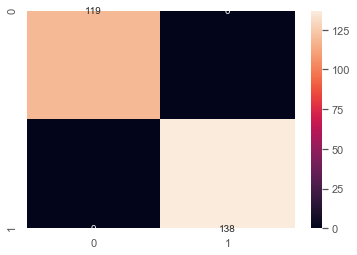

In [46]:
sns.heatmap(cm(y_test,y_pred),annot=True,fmt='d',robust=True)

In [ ]:
########################### THE END #######################################